# Logistic Regression

### TODO
1. Multidimensional
2. Add comments 
3. SGD Log-reg https://medium.com/aiguys/logistic-regression-in-machine-learning-from-scratch-62f45048c571

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Generowanie danych

In [2]:
size = 30
st1 = int(0.33 * size)
st2 = int(0.33 * size)
st3 = size - st1 - st2

data_X = np.sort(np.random.uniform(-1, 1, size=size))
# data_Y = np.array([0 for x in range(int(0.5 * size))] + [1 for x in range(size - int(0.5 * size))])
data_Y = np.array([0 for _ in range(st1)] + [0 if x < 0 else 1 for x in np.random.randn(st2)] + [1 for _ in range(st3)])

df = pd.DataFrame({'intercept': 1,
                   'data': data_X,
                   'label': data_Y})
display(df)

X = df[['intercept', 'data']].values
Y = df[['label']].values

,intercept,data,label
0,1,-0.946133,0
1,1,-0.862171,0
2,1,-0.774773,0
3,1,-0.679176,0
4,1,-0.665232,0
5,1,-0.449293,0
6,1,-0.372868,0
7,1,-0.350390,0
8,1,-0.150250,0
9,1,-0.138736,0


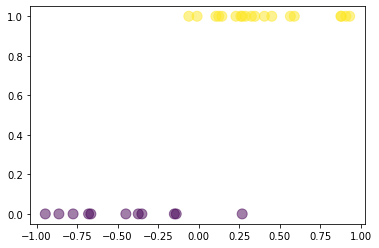

In [3]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.show()

Szukamy funkcji:
$$
\LARGE{p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}},
$$

która najlepiej opisze nasze dane.

In [4]:
beta_0 = -1.
beta_1 = 6.

beta = np.array([[beta_0], [beta_1]])
display(beta)

x = np.concatenate([np.ones((100, 1)), np.linspace(-1, 1, 100).reshape(-1, 1)], axis=1)

y = x.dot(beta)

p = 1 / (1 + np.exp(- y))

array([[-1.],
       [ 6.]])

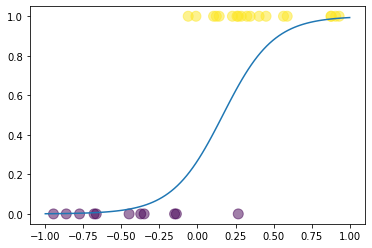

In [5]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.plot(x[:, 1], p)
plt.show()

Obliczamy $log odds$:
$$
\LARGE{\log\left(\frac{p(X)}{1-p(X)}\right)} = \beta_0 + \beta_1X
$$

In [6]:
data_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
data_Y/(1 - data_Y)

/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_87268/1701250205.py:1: RuntimeWarning: divide by zero encountered in divide
  data_Y/(1 - data_Y)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., inf, inf, inf,
       inf, inf, inf, inf,  0., inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf])

In [8]:
print(f"Logarytm z 0 = {np.log(0)}")
print(f"Logarytm z +nieskończoności = {np.log(np.inf)}")

Logarytm z 0 = -inf
Logarytm z +nieskończoności = inf


/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_87268/1924397170.py:1: RuntimeWarning: divide by zero encountered in log
  print(f"Logarytm z 0 = {np.log(0)}")


In [9]:
log_ods = np.log(data_Y/(1 - data_Y))
log_ods

/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_87268/4087979541.py:1: RuntimeWarning: divide by zero encountered in divide
  log_ods = np.log(data_Y/(1 - data_Y))
/var/folders/l4/h7lvw0ws1rgfbrc3cv2rl9_r0000gp/T/ipykernel_87268/4087979541.py:1: RuntimeWarning: divide by zero encountered in log
  log_ods = np.log(data_Y/(1 - data_Y))


array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf, -inf,  inf,  inf,  inf,  inf,
        inf,  inf,  inf,  inf,  inf,  inf,  inf,  inf])

To jest bardzo trudne narysować plus i minus `nieskończoność` na wykresie...

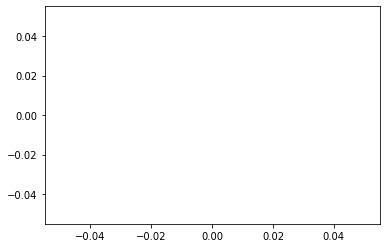

In [10]:
plt.scatter(data_X, log_ods, s=100, alpha=0.5, c=data_Y)
plt.show()

żeby ułatwoć sobie sprawę zastąpmy `nieskończoność` jakąś dużą liczbą (ale rozsądnie dużą)

In [12]:
my_infinity = 10
log_ods_vis = [-my_infinity if x==-np.inf else my_infinity for x in log_ods]

In [13]:
X_log_ods = X.dot(beta)

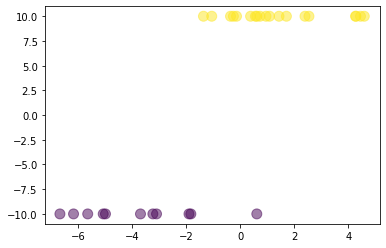

In [14]:
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.show()

In [15]:
log_ods_p = np.log(p/(1-p))
x_log_ods_p = x.dot(beta)

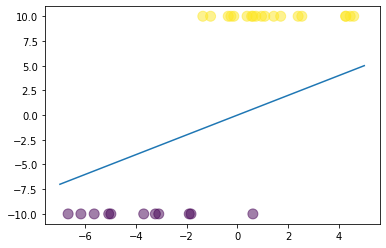

In [16]:
plt.plot(x_log_ods_p, log_ods_p)
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.show()

In [17]:
y_projectcion = X.dot(beta)

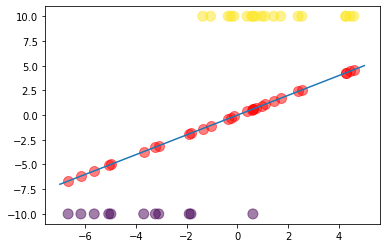

In [18]:
plt.plot(x_log_ods_p, log_ods_p)
plt.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
plt.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')
plt.show()

In [19]:
prob_y = 1 / (1 + np.exp(-y_projectcion))

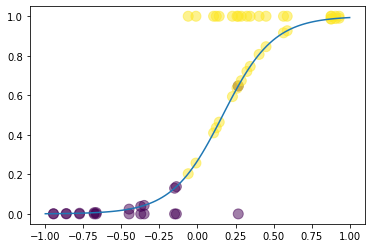

In [20]:
plt.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
plt.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
plt.plot(x[:, 1], p)

Lilelihood

In [21]:
lilelihood = np.prod(
    np.where(prob_y >= 0.5, prob_y, 1 - prob_y)
)

print(f"Lilelihood: {lilelihood}")

Lilelihood: 0.002206582023974209


In [22]:
log_lilelihood = np.sum(
    np.log(
        np.where(prob_y >= 0.5, prob_y, 1 - prob_y)
    )
)


print(f"Log-lilelihood: {log_lilelihood}")

Log-lilelihood: -6.11631055615262


In [23]:
import warnings
warnings.filterwarnings('ignore')

beta_0: 0.9554282185960401
beta_1: 5.360268411472485


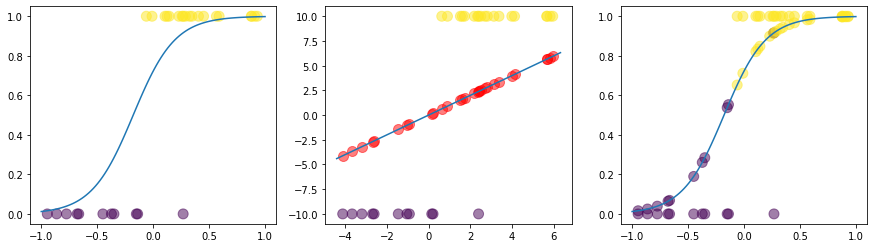

Lilelihood: 0.013723536936788619
Log-lilelihood: -4.288642895681044

beta_0: 0.8726724452886612
beta_1: 2.6682141745224097


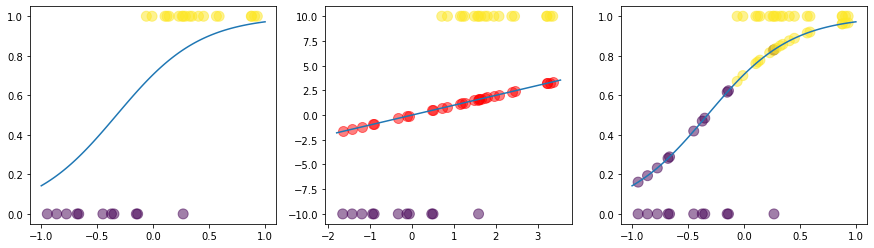

Lilelihood: 0.000554489283374047
Log-lilelihood: -7.497463078007959

beta_0: 0.12533756619567837
beta_1: 6.470116504023119


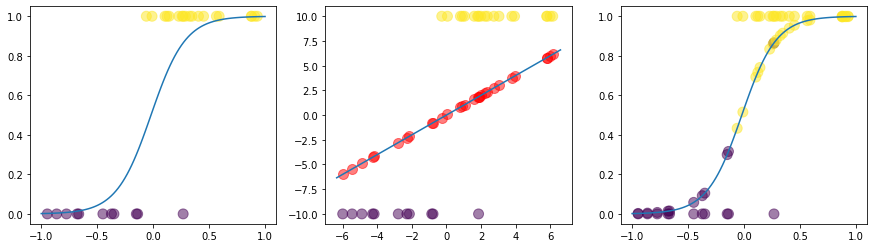

Lilelihood: 0.012446581702404546
Log-lilelihood: -4.386309255826342

beta_0: -0.17133815868845703
beta_1: 9.324010627224036


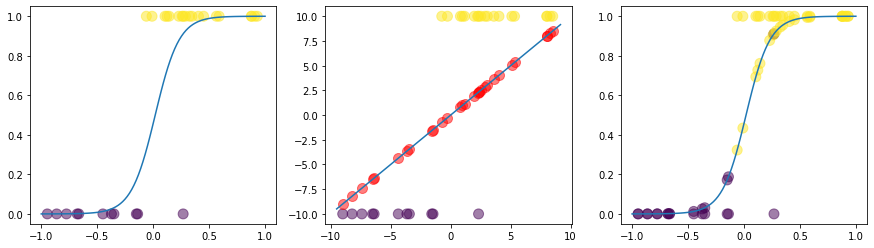

Lilelihood: 0.04780654711247313
Log-lilelihood: -3.0405926799839156

beta_0: 0.5090203085319727
beta_1: 7.713747340770213


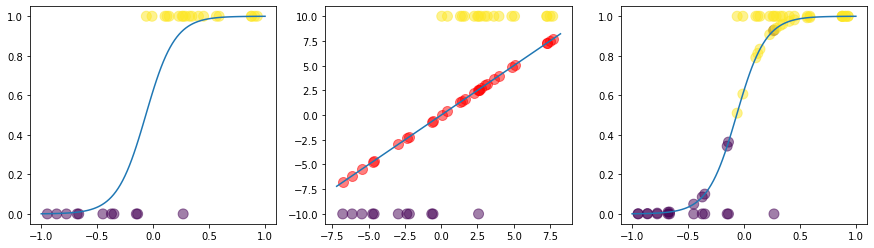

Lilelihood: 0.03086443017708874
Log-lilelihood: -3.478150885089017

beta_0: -0.6342941441686423
beta_1: 5.522586832193133


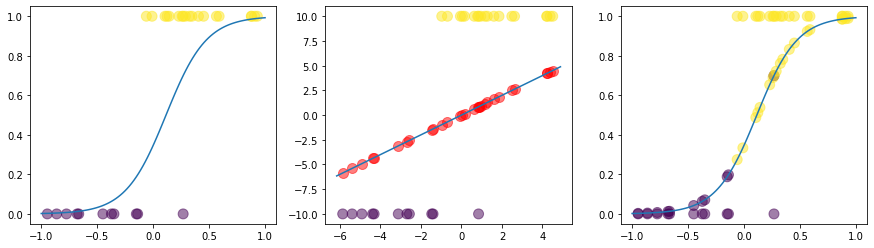

Lilelihood: 0.001983922577373706
Log-lilelihood: -6.22267929438205

beta_0: 0.629672071865254
beta_1: 4.327565378794029


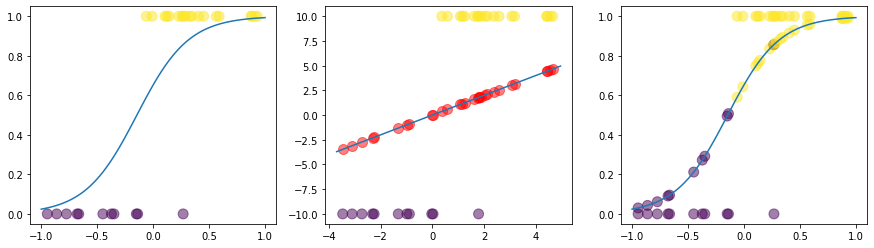

Lilelihood: 0.003359076773482797
Log-lilelihood: -5.696089112559947

beta_0: -0.20752100492225178
beta_1: 9.235376055020385


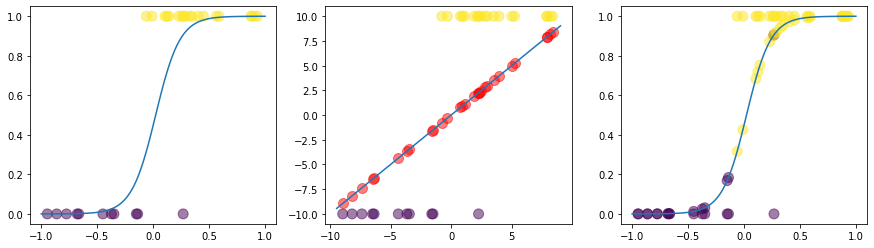

Lilelihood: 0.04567882668748881
Log-lilelihood: -3.0861203994395483

beta_0: 0.41087743693389944
beta_1: 2.7580898003737655


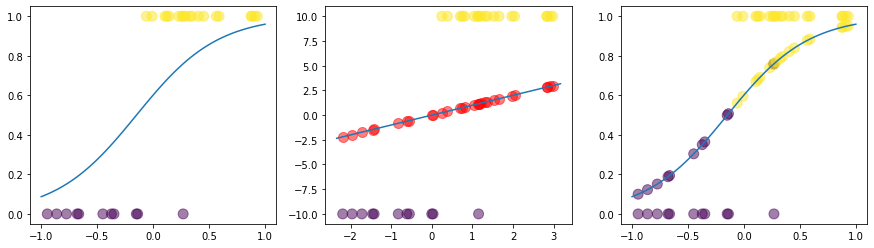

Lilelihood: 0.0002245666434754444
Log-lilelihood: -8.401338041936764

beta_0: -0.7041020557323543
beta_1: 5.657567244218501


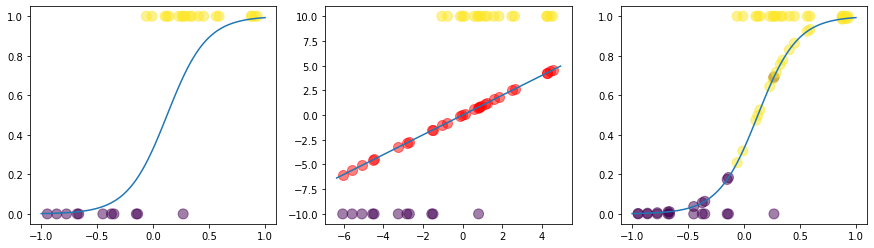

Lilelihood: 0.0020245915065393023
Log-lilelihood: -6.202387323938669



In [24]:
for i in range(10):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

    beta_0 = np.random.uniform(-1, 1)
    beta_1 = np.random.uniform(0, 10)

    print(f"beta_0: {beta_0}")
    print(f"beta_1: {beta_1}")

    x = np.linspace(-1, 1, 100)
    y = beta_0 + beta_1 * x
    p = 1 / (1 + np.exp(- y))


    ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
    ax1.plot(x, p)


    log_ods = np.log(data_Y/(1 - data_Y))
    log_ods_vis = [-10 if x==-np.inf else 10 for x in log_ods]
    X_log_ods = beta_0 + beta_1 * data_X

    log_ods_p = np.log(p/(1-p))
    x_log_ods_p = beta_0 + beta_1 * x

    y_projectcion = beta_0 + beta_1 * data_X

    ax2.plot(x_log_ods_p, log_ods_p)
    ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
    ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

    prob_y = 1 / (1 + np.exp(-y_projectcion))

    ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
    ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
    ax3.plot(x, p)

    plt.show()


    lilelihood = np.prod(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )

    log_lilelihood = np.sum(
        np.log(
            np.where(prob_y > 0.5, prob_y, 1 - prob_y)
        )
    )

    print(f"Lilelihood: {lilelihood}")
    print(f"Log-lilelihood: {log_lilelihood}")
    print()

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(data_X.reshape(-1, 1), data_Y)

LogisticRegression(penalty='none', solver='newton-cg')

In [26]:
model.coef_[0, 0]

9.234534649550852

In [27]:
model.intercept_[0]

0.49626119809539043

beta_0: 0.49626119809539043
beta_1: 9.234534649550852


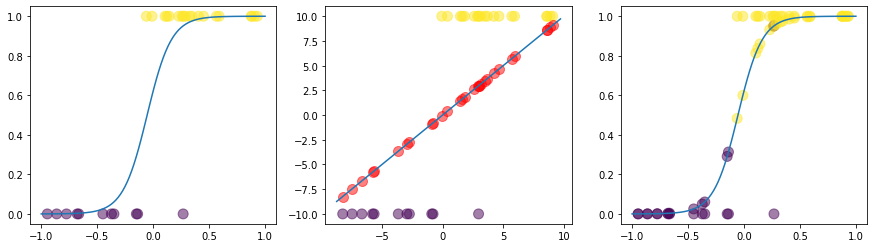

Lilelihood: 0.05366452273267963
Log-lilelihood: -2.9250031525442735



In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0, 0]

print(f"beta_0: {beta_0}")
print(f"beta_1: {beta_1}")

x = np.linspace(-1, 1, 100)
y = beta_0 + beta_1 * x
p = 1 / (1 + np.exp(- y))


ax1.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax1.plot(x, p)


log_ods = np.log(data_Y/(1 - data_Y))
log_ods_vis = [-10 if x==-np.inf else 10 for x in log_ods]
X_log_ods = beta_0 + beta_1 * data_X

log_ods_p = np.log(p/(1-p))
x_log_ods_p = beta_0 + beta_1 * x

y_projectcion = beta_0 + beta_1 * data_X

ax2.plot(x_log_ods_p, log_ods_p)
ax2.scatter(X_log_ods, log_ods_vis, s=100, alpha=0.5, c=data_Y)
ax2.scatter(X_log_ods, y_projectcion, s=100, alpha=0.5, c='red')

prob_y = 1 / (1 + np.exp(-y_projectcion))

ax3.scatter(data_X, data_Y, s=100, alpha=0.5, c=data_Y)
ax3.scatter(data_X, prob_y, s=100, alpha=0.5, c=data_Y)
ax3.plot(x, p)

plt.show()


lilelihood = np.prod(
    np.where(prob_y > 0.5, prob_y, 1 - prob_y)
)

log_lilelihood = np.sum(
    np.log(
        np.where(prob_y > 0.5, prob_y, 1 - prob_y)
    )
)

print(f"Lilelihood: {lilelihood}")
print(f"Log-lilelihood: {log_lilelihood}")
print()

In [29]:
model.decision_function(data_X.reshape(-1, 1))

array([-8.24083366, -7.46548517, -6.65840262, -5.77561165, -5.646847  ,
       -3.65275328, -2.94699866, -2.73943018, -0.89122783, -0.78490201,
       -0.06626172,  0.4038818 ,  1.47423765,  1.63787829,  1.8154598 ,
        2.61698337,  2.89300052,  2.97080645,  2.97445607,  3.15478666,
        3.4942878 ,  3.69505769,  4.23619738,  4.6572366 ,  5.71596797,
        5.94053698,  8.59415027,  8.61771166,  8.87548582,  9.09195519])

In [30]:
y_projectcion

array([-8.24083366, -7.46548517, -6.65840262, -5.77561165, -5.646847  ,
       -3.65275328, -2.94699866, -2.73943018, -0.89122783, -0.78490201,
       -0.06626172,  0.4038818 ,  1.47423765,  1.63787829,  1.8154598 ,
        2.61698337,  2.89300052,  2.97080645,  2.97445607,  3.15478666,
        3.4942878 ,  3.69505769,  4.23619738,  4.6572366 ,  5.71596797,
        5.94053698,  8.59415027,  8.61771166,  8.87548582,  9.09195519])

In [31]:
model.predict(data_X.reshape(-1, 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
model.predict_proba(data_X.reshape(-1, 1))

array([[9.99736405e-01, 2.63594851e-04],
       [9.99427820e-01, 5.72179669e-04],
       [9.98718450e-01, 1.28155000e-03],
       [9.96907295e-01, 3.09270505e-03],
       [9.96483782e-01, 3.51621758e-03],
       [9.74735189e-01, 2.52648108e-02],
       [9.50121445e-01, 4.98785551e-02],
       [9.39313623e-01, 6.06863769e-02],
       [7.09143488e-01, 2.90856512e-01],
       [6.86735647e-01, 3.13264353e-01],
       [5.16559372e-01, 4.83440628e-01],
       [4.00380053e-01, 5.99619947e-01],
       [1.86299367e-01, 8.13700633e-01],
       [1.62753971e-01, 8.37246029e-01],
       [1.39979553e-01, 8.60020447e-01],
       [6.80533653e-02, 9.31946635e-01],
       [5.25006588e-02, 9.47499341e-01],
       [4.87623027e-02, 9.51237697e-01],
       [4.85932950e-02, 9.51406705e-01],
       [4.09030842e-02, 9.59096916e-01],
       [2.94751978e-02, 9.70524802e-01],
       [2.42436618e-02, 9.75756338e-01],
       [1.42563012e-02, 9.85743699e-01],
       [9.40339494e-03, 9.90596605e-01],
       [3.282153

In [33]:
prob_y

array([2.63594851e-04, 5.72179669e-04, 1.28155000e-03, 3.09270505e-03,
       3.51621758e-03, 2.52648108e-02, 4.98785551e-02, 6.06863769e-02,
       2.90856512e-01, 3.13264353e-01, 4.83440628e-01, 5.99619947e-01,
       8.13700633e-01, 8.37246029e-01, 8.60020447e-01, 9.31946635e-01,
       9.47499341e-01, 9.51237697e-01, 9.51406705e-01, 9.59096916e-01,
       9.70524802e-01, 9.75756338e-01, 9.85743699e-01, 9.90596605e-01,
       9.96717847e-01, 9.97376285e-01, 9.99814848e-01, 9.99819159e-01,
       9.99860246e-01, 9.99887445e-01])

In [36]:
model.predict_log_proba(data_X.reshape(-1, 1))

array([[-2.63629598e-04, -8.24109729e+00],
       [-5.72343427e-04, -7.46605751e+00],
       [-1.28237189e-03, -6.65968499e+00],
       [-3.09749735e-03, -5.77870915e+00],
       [-3.52241400e-03, -5.65036942e+00],
       [-2.55894457e-02, -3.67834273e+00],
       [-5.11654658e-02, -2.99816413e+00],
       [-6.26058587e-02, -2.80203604e+00],
       [-3.43697392e-01, -1.23492522e+00],
       [-3.75805854e-01, -1.16070787e+00],
       [-6.60565046e-01, -7.26826768e-01],
       [-9.15341051e-01, -5.11459246e-01],
       [-1.68040040e+00, -2.06162753e-01],
       [-1.81551560e+00, -1.77637310e-01],
       [-1.96625892e+00, -1.50799114e-01],
       [-2.68746310e+00, -7.04797249e-02],
       [-2.94692956e+00, -5.39290373e-02],
       [-3.02079775e+00, -4.99913030e-02],
       [-3.02426972e+00, -4.98136475e-02],
       [-3.19654981e+00, -4.17631499e-02],
       [-3.52420612e+00, -2.99183206e-02],
       [-3.71960007e+00, -2.45423772e-02],
       [-4.25055628e+00, -1.43588986e-02],
       [-4.